# Jacobi identity check with SymPy

The Jacoby Identity (JI) is a propriety that may be satisfied by binary operations. It is defined as follow:

given a set $ S $ with an associative binary operation $ + $, the operation $ \times $ satisfies the Jacobi identity if:

$ a \times (b \times c) + b \times (c \times a) + c \times (a \times b) = 0 \;\;\;\;\;\;\;\;\; \forall \; a,b,c \in S $

This is easy to remember if is noted that the letters just change place cyclically!
This identity determines how an operations behaves with  respect of the elements order and has many application both in mathematics and physics. Four example will be given, the usual multiplication of real numbers, the cross product in 3-dimensional vector space, the Poisson Bracket in the space of continues function with continues derivate and the commutator operation in the space of operators.

SymPy is a library that implements symbolic computations and we will see how to use it to check if a given operation satisfies the JI without making boring computations! All information and all the source code of methods and functions below are available at http://www.sympy.org/en/index.html.

## Usual multiplication of real numbers

The usual multiplication of real numbers is considered, which is really simple to check also with old-fashion handwriting, anyway here it is a code that checks if the JI is satisfied!

In [30]:
#Import the sympy library and initialize a printing option, so to have more elegant output 

from sympy import *
init_printing(use_unicode=True)

#Tell python that the following letters are just symbols

a,b,c = symbols ('a b c')

simplify(a*(b*c)+b*(c*a)+c*(a*b))

Which is the expected result, so JI is not satisfied by multiplication.

## Cross Product

Given two vectors in a coordinate system $ v = (v_1, v_2, v_3) , \;\; w = (w_1, w_2, w_3) $ the cross product is defined as:

$ v \times w = (v_2 w_3 - v_3 w_2,\; -(v_1 w_3 - v_3 w_1),\; v_1 w_2 - v_2 w_1) $

This operation is anti-commutative, $v\times w = -( w\times v) $ and depends on the orientation of the coordinate system. Actually, the result of this operation is a pseudo-vector, and not a vector [1][2]. The difference is that if we change the orientation of the coordinate system, or more intuitively if we imagine to look the system through a mirror, a (polar) vector will just be reflected while a pseudo-vector will be inverted and reflected.

A physical example of pseudo-vector is the angular momentum $\vec{L}$ of a particle that is defined as its momentum $\vec{p}$ cross its distance $\vec{r}$ from the rotation axis:

$ \vec{L} = \vec{r} \times \vec{p}  $

Another physical equation in which cross product appears is the Lorenz force, the force applied on particle of charge $q$ in motion with velocity $\vec{v}$ in a magnetic field $\vec{B}$

$ \vec{F_{Lorenz}} = q (\vec{v} \times \vec{B}) $,

and since neither the force or the velocity may be pseudo-vectors for symmetry reasons, the magnetic fields is a pseudo-vector.

In the following code, python is used to check the JI and the anti-commutativity proprieties!

Luckily, SymPy has a predefined function .cross() that takes as argument two vectors and returns the cross product. For simplicity sake, the vectors will be defined as column matrices with a Cartesian coordinate system implicitly assumed.

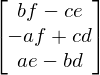

In [9]:
#Import the sympy library and initilize a printing option, so to have more elegant output 

from sympy import *
init_printing(use_unicode=True)

#Tell python that the following letters are just symbols

a,b,c,d,e,f,g,h,i = symbols ('a b c d e f g h i')

#Define three vector ([1,3]-dimensional matrix)

v1 = Matrix([a, b, c])
v2 = Matrix([d, e, f])
v3 = Matrix([g, h, i])

#See how cross product works!

v1.cross(v2)

In [10]:
#Check anticommuative propriety

v1.cross(v2) == -v2.cross(v1)

True

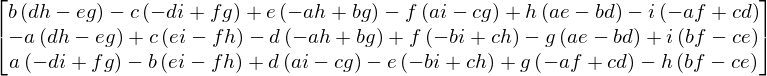

In [11]:
#Try the JI

(v1.cross(v2.cross(v3)) + v2.cross(v3.cross(v1)) + v3.cross(v1.cross(v2)))

In [12]:
#But it is not much encouraging, so we use simplify() function to make all the boring algebra work!

simplify((v1.cross(v2.cross(v3)) + v2.cross(v3.cross(v1)) + v3.cross(v1.cross(v2))))

Since $a,b,c,d,e,f,g,h,i$ are just symbols, the results is the zero vector for every triple of vector we may think of. 
And that is it. A boring computations has been avoided! A much more cumbersome computations is avoided in the next example.

## Poisson bracket

Given two functions $f$ e $ g $, (with continues second derivative) that depend on the canonical variables $q_i, \; p_i $ the Poisson Bracket are defined as:

$ \{f,g\} = \sum\limits_{i=1}^N \bigg( \frac{\partial f}{\partial q_i} \frac{\partial g}{\partial p_i} - \frac{\partial f}{\partial p_i} \frac{\partial g}{\partial q_i} \bigg) $

In classical mechanics is proved that given a physical quantity $A$ and the Hamiltonian of the system $H$, the derivative of $A$ with respect to time is given by

$ \frac{dA}{dt}=\frac{\partial A}{\partial t} + \{A,H\} $

Also, the Poisson Bracket of a constant of motion with $H$ vanishes. The interested reader may find more information in any classical mechanics, analytical mechanics or rational mechanics textbook.

This time there is no predefined function for the Poisson Bracket operation, as far as I know. A very rudimentary function is implemented that given as argument two functions, just returns the i-th element of the sum. For brevity, the functions where assumed to be function of the canonical variables and no check on the arguments has been implemented.

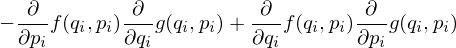

In [23]:
#Import the required libraries

from sympy import *
init_printing(use_unicode=True)

#define the functions of p and q

p = Symbol('p_i')
q = Symbol('q_i') 
f = Function('f')(q,p)
g = Function('g')(q,p)
h = Function('h')(q,p)

"""
Define a funcion that returns the i-th element of the sum of the Poisson Brackets
"""

def Pb(f,g):

    """
    Given two functions the i-th element of the Poisson bracket sum is returned
    """

    return f.diff(q)*g.diff(p) - f.diff(p)*g.diff(q)
    
#Check how the function works

Pb(f,g) 

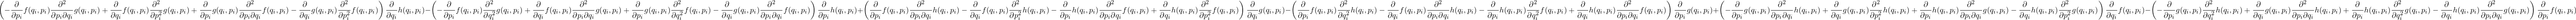

In [24]:
#Try the JI

Pb(f,Pb(g,h))+Pb(g,Pb(h,f))+Pb(h,Pb(f,g))

In [25]:
#This is almost terrifying, but luckily we have the simplify() function!

simplify(Pb(f,Pb(g,h))+Pb(g,Pb(h,f))+Pb(h,Pb(f,g)))

This time the benefit is notable. We have shown that all the elements of the sum are zeros, and we have checked the JI propriety using only the definition!

## Commutator

In quantum mechanics a physical quantity is an operator $ \hat{A} $ that maps a physical state into another one, where a physical state is a vector in a (complex) Hilbert space. Operator can be represented by finite or infinite matrices.
The commutator operation is defined as follows:

$ [\hat{A},\hat{B}] = \hat{A}\hat{B}-\hat{B}\hat{A} $

This operation emphasize by itself that, in general, operators do not commute. For example, a given component of the position and the velocity of a particle are operators (the resulting of a measure is an eigenvalue) that does not commute, and it can be shown [3] that a simultaneous base of eigenvector (or more precisely eigenstate) cannot be found, thus the impossibility of measuring position and velocity simultaneously, or in other words the Heisenberg uncertainty principle!
The interested reader may find more information in any quantum mechanics textbook. In particular, [3] and [4] emphasizes analogies between classical mechanics and quantum mechanics starting from Poisson Bracket and commutator.
This time a predefined function Commutator(,) is given with a method .doit(), which takes as argument two operators and returns the computation result. 

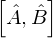

In [26]:
#Import the required libraries

from sympy import *
from sympy.physics.quantum import *  #for using Operator() and Commutator()
init_printing(use_unicode=True)      #for beautifull output

#Define three operators

A = Operator('\hat{A}')              #The output is LaTex-like
B = Operator('\hat{B}')
C = Operator('\hat{C}')

#See what Commutator() does 

Commutator(A,B) #Just printes the commutator with brackets notations

In [27]:
#Use the metod doit to evaluate the commutator

com = Commutator(A,B)
com.doit()

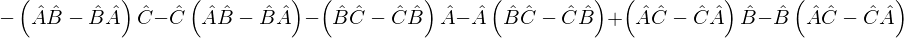

In [28]:
#Let us define the identity

Ji = Commutator(A,Commutator(B,C))+Commutator(B,Commutator(C,A))+Commutator(C,Commutator(A,B))

Ji.doit()

In [29]:
#as before, we need the simplify function

Ji = Commutator(A,Commutator(B,C))+Commutator(B,Commutator(C,A))+Commutator(C,Commutator(A,B))

simplify(Ji.doit())

As we wanted to show.

## Bibliography

[1] Classical Mechanics of Herbert Goldstein, Charles P. Poole Jr., John L. Safko.

[2] Classical Mechanics with Mathematica of Antonio Romano.

[3] Principles of quantum mechanics of P.A.M. Dirac.

[4] Modern quantum mechanics of Sakurai and Napolitano.